# Transfer Learning

# Transfer Learning is a research problem in machine learning that focusus on storing knowledge gained while solving problem
# and applying it to a different but related problem. For Example, knowledge gained while learning to recognize cars could
# apply when trying to recognize trucks and so on.

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2
import os
import PIL.Image as Image
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [29]:
#Pre trained model from tensorflow for image classification
IMAGE_SHAPE = (224, 224)

classifier=tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4',input_shape=IMAGE_SHAPE+(3,))
])

In [30]:
#Shape of the image is 244,*244 with 3 RGB Channels
IMAGE_SHAPE+(3, )


(224, 224, 3)

In [32]:
#Download flowers dataset from google storage and store it in local current working directory
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [33]:
#path of the directory
data_dir

'.\\datasets\\flower_photos'

In [34]:
#converting path to windows path for easy access
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [35]:
# counting no of images in the directory
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [36]:
#rose category
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

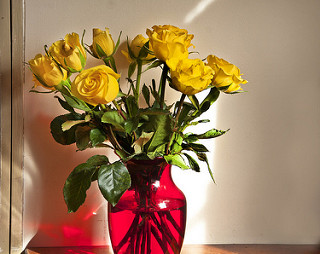

In [37]:
#find the image with image.open function
Image.open(str(roses[13]))

In [38]:
#similarly tulips flowers data can be accessed
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

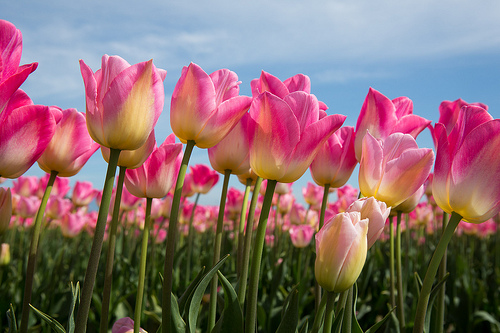

In [11]:
Image.open(str(tulips[3]))

In [39]:
#create a dictionary for all categories
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [40]:
#label all the categories
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [14]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [42]:
#read image using cv2.read function
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [43]:
#resizing all images with 244,244
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
    #print(flower_name)
    #print(len(flower_name))

In [44]:
X[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [45]:
#store all the images into numpy array before test and train split
X=np.array(X)
y=np.array(y)

In [48]:
#test and train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [54]:
#normalizing the image size by dividing each set with 255
X_train_scaled=X_train/255
X_test_scaled=X_test/255

MemoryError: Unable to allocate 3.09 GiB for an array with shape (2752, 224, 224, 3) and data type float64

In [50]:
#scaled image array
X_train_scaled[0]

array([[[0.27843137, 0.3254902 , 0.31764706],
        [0.24705882, 0.28235294, 0.2627451 ],
        [0.25490196, 0.27058824, 0.24705882],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.23137255, 0.25882353, 0.25490196],
        [0.23137255, 0.25490196, 0.23529412],
        [0.25490196, 0.2627451 , 0.23921569],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.21960784, 0.22352941, 0.21960784],
        [0.23921569, 0.24313725, 0.22745098],
        [0.25098039, 0.25098039, 0.22745098],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16470588, 0.15294118]],

       ...,

       [[0.19215686, 0.49803922, 0.37647059],
        [0.14901961, 0.2627451 , 0.19607843],
        [0.20392157, 0

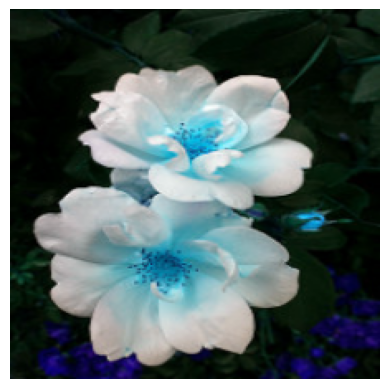

In [51]:
plt.axis('off')
plt.imshow(X[0])

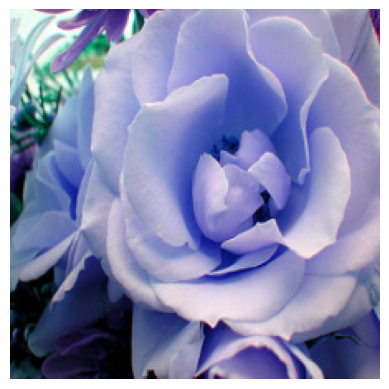

In [23]:
plt.axis('off')
plt.imshow(X[15])

In [52]:
#prediciting using classifier
predicted=classifier.predict(np.array([X[0],X[1],X[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 1s 862ms/step


array([795, 880, 795], dtype=int64)

In [25]:
#creating a feature extractor model on top of classifier 
feature_extractor_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),trainable=False)


In [53]:
#create an artificial neural network to extract the pretrained model details
num_of_flowers=5
model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
# Now compile your feature extractor model with less epochs, say 5 to get the optimized result 
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 71s 800ms/step - loss: 0.4155 - accuracy: 0.8528
Epoch 2/5
86/86 [==============================] - 71s 826ms/step - loss: 0.3057 - accuracy: 0.8979
Epoch 3/5
86/86 [==============================] - 72s 835ms/step - loss: 0.2535 - accuracy: 0.9204
Epoch 4/5
86/86 [==============================] - 72s 841ms/step - loss: 0.2163 - accuracy: 0.9357
Epoch 5/5
86/86 [==============================] - 70s 814ms/step - loss: 0.1884 - accuracy: 0.9451


# In Training ANN models it takes lot of computational resources like electricity, memory and speed of the system. Hence 
# adapoting these Transfer Learning Methos will increase your system speed by using existing pre-trained models as mentioned above.

Thank you~~